## Assignments

As in previous checkpoints, please submit links to two Juypyter notebooks (one for each assignment below).

Please submit links to all your work below. This is not a graded checkpoint, but you should discuss your solutions with your mentor. Also, when you're done, compare your work to [these example solutions](https://github.com/Thinkful-Ed/machine-learning-regression-problems/blob/master/notebooks/5.solution_evaluating_goodness_of_fit.ipynb).



### 1. Weather model

For this assignment, you'll revisit the historical temperature dataset. To complete this assignment, submit a link a Jupyter notebook containing your solutions to the following tasks:

* First, load the dataset from the **weatherinszeged** table from Thinkful's database.
* Like in the previous checkpoint, build a linear regression model where your target variable is the difference between the *apparenttemperature* and the *temperature*. As explanatory variables, use *humidity* and *windspeed*. Now, estimate your model using OLS. What are the R-squared and adjusted R-squared values? Do you think they are satisfactory? Why? 
* Next, include the interaction of *humidity* and *windspeed* to the model above and estimate the model using OLS. Now, what is the R-squared of this model? Does this model improve upon the previous one? 
* Add *visibility* as an additional explanatory variable to the first model and estimate it. Did R-squared increase? What about adjusted R-squared? Compare the differences put on the table by the interaction term and the *visibility* in terms of the improvement in the adjusted R-squared. Which one is more useful?
* Choose the best one from the three models above with respect to their AIC and BIC scores. Validate your choice by discussing your justification with your mentor.


In [12]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

import ds_useful

[My Useful Data Science Functions](https://github.com/cobyoram/python-for-data-scientists/blob/master/ds_useful.py)

In [13]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'
table = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

data = pd.read_sql_query('SELECT * FROM {}'.format(table), con=engine)

engine.dispose()

In [14]:
weather = data.copy()
weather.head()

date        summary preciptype  temperature  \
0 2006-03-31 22:00:00+00:00  Partly Cloudy       rain     9.472222   
1 2006-03-31 23:00:00+00:00  Partly Cloudy       rain     9.355556   
2 2006-04-01 00:00:00+00:00  Mostly Cloudy       rain     9.377778   
3 2006-04-01 01:00:00+00:00  Partly Cloudy       rain     8.288889   
4 2006-04-01 02:00:00+00:00  Mostly Cloudy       rain     8.755556   

   apparenttemperature  humidity  windspeed  windbearing  visibility  \
0             7.388889      0.89    14.1197        251.0     15.8263   
1             7.227778      0.86    14.2646        259.0     15.8263   
2             9.377778      0.89     3.9284        204.0     14.9569   
3             5.944444      0.83    14.1036        269.0     15.8263   
4             6.977778      0.83    11.0446        259.0     15.8263   

   loudcover  pressure                       dailysummary  
0        0.0   1015.13  Partly cloudy throughout the day.  
1        0.0   1015.63  Partly cloudy throughout the day.  
2        0.0   1015.94  Partly cloudy throughout the day.  
3        0.0   1016.41  Partly cloudy throughout the day.  
4        0.0   1016.51  Partly cloudy throughout the day.

In [15]:
# Feature engineering (given by assignment)

# make a target variable, difference between actual and apparent temperature
target = pd.DataFrame().assign(temperaturediff=weather['temperature'] - weather['apparenttemperature'])

#make features with given variables
features = weather[['humidity', 'windspeed']]
#
print(target.head())
features.head()

temperaturediff
0         2.083333
1         2.127778
2         0.000000
3         2.344444
4         1.777778


humidity  windspeed
0      0.89    14.1197
1      0.86    14.2646
2      0.89     3.9284
3      0.83    14.1036
4      0.83    11.0446

In [16]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

features = sm.add_constant(features)

X_train, X_test, Y_train, Y_test = train_test_split(features, target)

lrm = sm.OLS(Y_train, X_train)
results = lrm.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        temperaturediff   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                 1.470e+04
Date:                Wed, 19 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:15:17   Log-Likelihood:            -1.2784e+05
No. Observations:               72339   AIC:                         2.557e+05
Df Residuals:                   72336   BIC:                         2.557e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4602      0.024   -100.906      0.000      -2.508      -2.412
humidity       3.0521      0.028    110.016      0.000       2.998       3.106
windspeed      0.1199      0.001    153.161      0.000       0.118       0.121
==============================================================================
Omnibus:                     2935.656   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3437.274
Skew:                           0.477   Prob(JB):                         0.00
Kurtosis:                       3.481   Cond. No.                         88.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared and adjusted R-squared are 0.291. Perhaps we need to transform a feature or try another model. Let's try adding the interaction between windspeed and humidity

In [17]:
features = features.assign(windspeedhumidity = features['windspeed'] * features['humidity'])

X_train, X_test, Y_train, Y_test = train_test_split(features, target)

lrm = sm.OLS(Y_train, X_train)
results = lrm.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        temperaturediff   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.247e+04
Date:                Wed, 19 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:15:17   Log-Likelihood:            -1.2499e+05
No. Observations:               72339   AIC:                         2.500e+05
Df Residuals:                   72335   BIC:                         2.500e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0870      0.039     -2.252      0.024      -0.163      -0.011
humidity             -0.1761      0.050     -3.548      0.000      -0.273      -0.079
windspeed            -0.0902      0.003    -31.675      0.000      -0.096      -0.085
windspeedhumidity     0.2969      0.004     76.364      0.000       0.289       0.305
==============================================================================
Omnibus:                     3861.806   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7665.129
Skew:                           0.387   Prob(JB):                         0.00
Kurtosis:                       4.394   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This improved the model's performance. Let's compare it to adding a different variable from the original set

In [19]:
other_features = features.drop('windspeedhumidity', axis=1)
other_features['visibility'] = data['visibility']


X_train, X_test, Y_train, Y_test = train_test_split(other_features, target)

lrm = sm.OLS(Y_train, X_train)
results = lrm.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        temperaturediff   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                 1.068e+04
Date:                Wed, 19 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:16:51   Log-Likelihood:            -1.2707e+05
No. Observations:               72339   AIC:                         2.542e+05
Df Residuals:                   72335   BIC:                         2.542e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5982      0.032    -49.681      0.000      -1.661      -1.535
humidity       2.6288      0.029     89.708      0.000       2.571       2.686
windspeed      0.1208      0.001    156.368      0.000       0.119       0.122
visibility    -0.0538      0.001    -40.199      0.000      -0.056      -0.051
==============================================================================
Omnibus:                     2739.596   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3256.729
Skew:                           0.447   Prob(JB):                         0.00
Kurtosis:                       3.531   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Between adding an interaction variable and this new variable, the interaction variable performed much better with respect to R-squared. However, as far as AIC and BIC go, the visibility feature performed better than the interaction variable



###  2. House prices model

In this exercise, you'll work on your house prices model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

* Load the **houseprices** data from Thinkful's database.
* Run your house prices model again and assess the goodness of fit of your model using F-test, R-squared, adjusted R-squared, AIC and BIC.
* Do you think your model is satisfactory? If so, why?
* In order to improve the goodness of fit of your model, try different model specifications by adding or removing some variables. 
* For each model you try, get the goodness of fit metrics and compare your models with each other. Which model is the best and why?

In [21]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'
table = postgres_db

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

data = pd.read_sql_query('SELECT * FROM {}'.format(table), con=engine)

engine.dispose()

In [29]:
import scipy.stats as stats
import matplotlib.pyplot as plt

prices = data.copy()
target_name = 'saleprice'

# Remove correlated features with correlations >= .7 with each other
ds_useful.remove_correlated_features(prices, target_name, .5)

# Drop the rest of missing columns, rather than interpolating
missings = ds_useful.missingness_summary(prices)
prices.drop(missings.loc[missings > 5].index, axis=1, inplace=True)

# # Get percentages of repeated zeros in data and Remove columns with more htan 90% 0
repeats = ds_useful.repeats_summary(prices, value=0)
prices.drop(repeats.loc[repeats > 90].index, axis=1, inplace=True)

# Now binary encode data with a lot of repeated zeros
repeats = ds_useful.repeats_summary(prices, value=0)
num_binaries = repeats.loc[repeats > 50].index
for col in num_binaries:
    prices[col] = np.where(prices[col] == 0, 0, 1)

# Do the same with repeated modes (more than 90% is mode)
cat_repeats = ds_useful.repeats_summary(prices, value_agg='mode')
prices.drop(cat_repeats.loc[cat_repeats > 90].index, axis=1)

# Get repeating zeros again
repeats = ds_useful.repeats_summary(prices, value=0)
num_binaries = repeats.loc[repeats > 50].index
for col in num_binaries:
    prices[col] = np.where(prices[col] == prices[col].mode().iloc[0], 0, 1)

# Get outliers
outliers = ds_useful.outliers_summary(prices, 3)

# Reduce outliers list to those that are continuous
for col in outliers.index:
    if prices[col].nunique() < 20:
        outliers.drop(col, inplace=True)

# Winsorize the data
for column in outliers.index:
    percentiles = ds_useful.get_percentiles(prices, column, 3)
    prices[column] = stats.mstats.winsorize(prices[column], percentiles)

quality_map = {'Fa': 0, 'TA': 1, 'Gd': 2, 'Ex': 3}
quality_columns = ['kitchenqual', 'exterqual', 'bsmtqual', 'heatingqc', 'extercond']
for col in quality_columns:
    prices[col] = prices[col].map(quality_map)
prices

for col in quality_columns:
    prices.drop(prices.loc[prices[col] == 'Po', col].index, axis=0, inplace=True)

def get_significant_category_columns(df, target, sig=True):
    sig_cols = set()
    for col in df.select_dtypes('object').columns:
        ucats = []
        for ucat in df[col].unique():
            ucats.append(df.loc[df[col] == ucat, target])
        anova = stats.f_oneway(*ucats)
        if anova.pvalue < .05 and sig:
            sig_cols.update([col])
        if anova.pvalue >= .05 and not sig:
            sig_cols.update([col])
    return sig_cols

insig_cols = get_significant_category_columns(prices, 'saleprice', sig=False)
prices.drop(insig_cols, axis=1, inplace=True)

for cat_var in prices.select_dtypes('object').columns:
    if len(prices[cat_var].unique()) > 6:
        prices.drop(cat_var, axis=1, inplace=True)

keep_cols = ['saleprice', 'overallqual', 'extercond', 'lotarea', 'bsmtfinsf1', 'firstflrsf', 'centralair', 'salecondition', 'electrical', 'heating', 'mszoning']

prices = prices[keep_cols]

dummy_prices = pd.get_dummies(prices.select_dtypes('object'),drop_first=True)
house_prices = pd.concat([prices.select_dtypes('number'), dummy_prices], axis=1)
house_prices.dropna(axis=0, inplace=True)

ds_useful.missingness_summary(house_prices)

mszoning_RM              0.0
salecondition_Partial    0.0
overallqual              0.0
extercond                0.0
lotarea                  0.0
bsmtfinsf1               0.0
firstflrsf               0.0
centralair_Y             0.0
salecondition_AdjLand    0.0
salecondition_Alloca     0.0
salecondition_Family     0.0
salecondition_Normal     0.0
electrical_FuseF         0.0
mszoning_RL              0.0
electrical_FuseP         0.0
electrical_Mix           0.0
electrical_SBrkr         0.0
heating_GasA             0.0
heating_GasW             0.0
heating_Grav             0.0
heating_OthW             0.0
heating_Wall             0.0
mszoning_FV              0.0
mszoning_RH              0.0
saleprice                0.0
dtype: float64

In [30]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

y = house_prices['saleprice']
X = house_prices.drop('saleprice', axis=1)
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)
lrm = sm.OLS(y_train, X_train)
results = lrm.fit()
# help(results.summary)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     178.2
Date:                Wed, 19 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:47:23   Log-Likelihood:                -13837.
No. Observations:                1167   AIC:                         2.772e+04
Df Residuals:                    1142   BIC:                         2.785e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -9.82e+04   3.77e+04     -2.606      0.009   -1.72e+05   -2.43e+04
overallqual            3.319e+04    929.428     35.711      0.000    3.14e+04     3.5e+04
extercond                23.4456   2958.909      0.008      0.994   -5782.063    5828.955
lotarea                   3.2065      0.287     11.154      0.000       2.642       3.771
bsmtfinsf1               23.7637      2.611      9.103      0.000      18.642      28.886
firstflrsf               32.9590      3.667      8.988      0.000      25.764      40.154
centralair_Y           1851.7553   5188.576      0.357      0.721   -8328.456     1.2e+04
salecondition_AdjLand  1224.3454   1.86e+04      0.066      0.948   -3.54e+04    3.78e+04
salecondition_Alloca   1.438e+04   1.37e+04      1.047      0.295   -1.26e+04    4.13e+04
salecondition_Family  -5132.8629   9799.328     -0.524      0.601   -2.44e+04    1.41e+04
salecondition_Normal   1.888e+04   4155.601      4.542      0.000    1.07e+04     2.7e+04
salecondition_Partial  4.881e+04   5551.822      8.792      0.000    3.79e+04    5.97e+04
electrical_FuseF      -1122.1462   8761.137     -0.128      0.898   -1.83e+04    1.61e+04
electrical_FuseP      -5520.4745   2.16e+04     -0.255      0.799    -4.8e+04    3.69e+04
electrical_Mix        -3.441e+04   3.51e+04     -0.979      0.328   -1.03e+05    3.45e+04
electrical_SBrkr       1784.9905   4345.260      0.411      0.681   -6740.598    1.03e+04
heating_GasA          -3.284e+04   3.49e+04     -0.940      0.347   -1.01e+05    3.57e+04
heating_GasW          -2.655e+04   3.59e+04     -0.739      0.460   -9.71e+04     4.4e+04
heating_Grav          -3.554e+04   3.88e+04     -0.917      0.359   -1.12e+05    4.05e+04
heating_OthW           -9.43e+04   4.25e+04     -2.217      0.027   -1.78e+05   -1.08e+04
heating_Wall          -1.055e+04   3.89e+04     -0.271      0.786   -8.68e+04    6.57e+04
mszoning_FV            1.439e+04   1.54e+04      0.935      0.350   -1.58e+04    4.46e+04
mszoning_RH            6548.9980   1.68e+04      0.389      0.697   -2.65e+04    3.96e+04
mszoning_RL            5466.0764   1.45e+04      0.376      0.707   -2.31e+04     3.4e+04
mszoning_RM             399.0023   1.46e+04      0.027      0.978   -2.83e+04    2.91e+04
==============================================================================
Omnibus:                      167.146   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2073.104
Skew:                          -0.109   Prob(JB):                         0.00
Kurtosis:                       9.526   Cond. No.                     9.18e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

According to the R-squared (and the adjusted) statistic, this model is performing fairly well. The f-statistic is high, which may be good, and it's p-value is significantly low.

Both AIC and BIC are very high, aiding the assumption that this model may not fit the dataset well, and could be improved. First, we'll remove non-significant features



In [34]:
drop_cols = ['extercond', 'centralair_Y', 'salecondition_AdjLand', 'salecondition_Alloca', 'salecondition_Family', 'electrical_FuseF', 'electrical_FuseP', 'electrical_Mix', 'electrical_SBrkr', 'heating_GasA', 'heating_GasW', 'heating_Grav', 'heating_OthW', 'heating_Wall', 'heating_Wall', 'mszoning_FV', 'mszoning_RH', 'mszoning_RL', 'mszoning_RM']

X = X.drop(drop_cols, axis=1)
X_train_simp = X_train.drop(drop_cols, axis=1)
X_test_simp = X_test.drop(drop_cols, axis=1)

lrm_simp = sm.OLS(y_train, X_train_simp)
results_simp = lrm_simp.fit()

results_simp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     707.2
Date:                Wed, 19 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:07:40   Log-Likelihood:                -13847.
No. Observations:                1167   AIC:                         2.771e+04
Df Residuals:                    1160   BIC:                         2.774e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.259e+05   5833.952    -21.579      0.000   -1.37e+05   -1.14e+05
overallqual            3.349e+04    872.316     38.393      0.000    3.18e+04    3.52e+04
lotarea                   3.2885      0.272     12.074      0.000       2.754       3.823
bsmtfinsf1               24.5396      2.568      9.556      0.000      19.501      29.578
firstflrsf               32.7910      3.593      9.127      0.000      25.742      39.840
salecondition_Normal   1.934e+04   3574.420      5.412      0.000    1.23e+04    2.64e+04
salecondition_Partial  5.094e+04   5096.527      9.995      0.000    4.09e+04    6.09e+04
==============================================================================
Omnibus:                      170.583   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2061.802
Skew:                          -0.178   Prob(JB):                         0.00
Kurtosis:                       9.502   Cond. No.                     6.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since this one was a subset of the other one, we can conclude that the higher f-statistic bodes well for this model.  The R-squared scores fell slightly, and the AIC and BIC remained rather high. Let's try adding back some features!

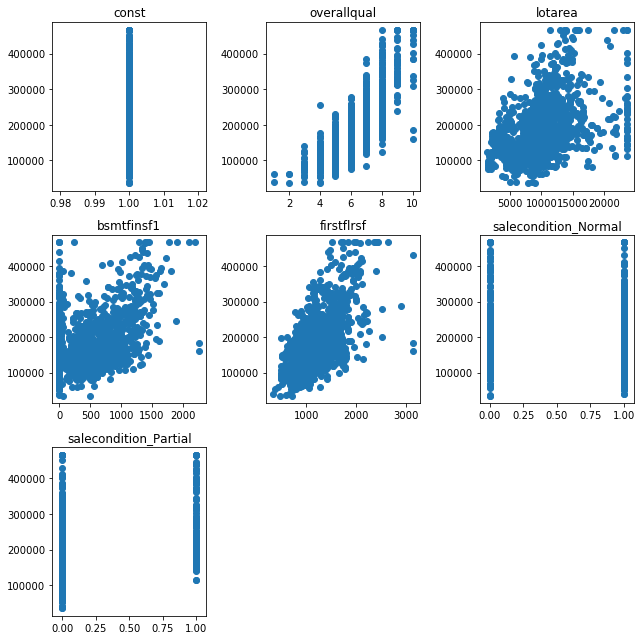

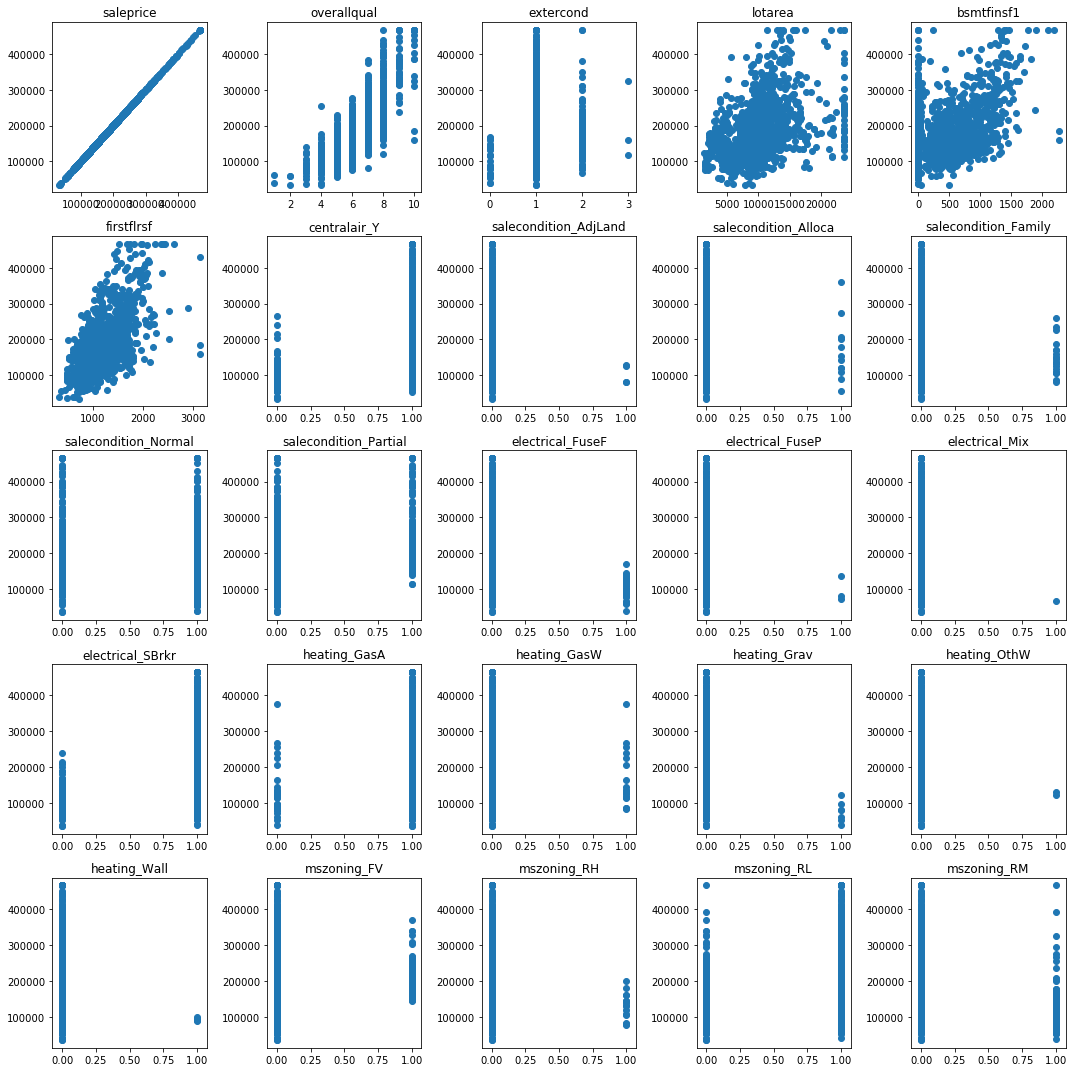

In [41]:
import seaborn as sns
def plot_cat(df, col, y):
    sns.boxenplot(x=df[col], y=y)

def plot_num(df, col, y):
    plt.scatter(df[col], y)

ds_useful.make_subplots(X, plot_num, [y])

ds_useful.make_subplots(house_prices, plot_num, [house_prices[target_name]])

Perhaps our old extercond variable would make more sense as an interaction with lotarea? Let's give it a try

In [44]:
X = X.assign(lotarea_ext=X['lotarea']*house_prices['extercond'])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

lrm = sm.OLS(y_train, X_train)

results = lrm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     623.0
Date:                Wed, 19 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:23:55   Log-Likelihood:                -13832.
No. Observations:                1167   AIC:                         2.768e+04
Df Residuals:                    1159   BIC:                         2.772e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.228e+05   5798.724    -21.185      0.000   -1.34e+05   -1.11e+05
overallqual            3.348e+04    877.150     38.169      0.000    3.18e+04    3.52e+04
lotarea                   3.0806      0.412      7.474      0.000       2.272       3.889
bsmtfinsf1               26.3102      2.550     10.318      0.000      21.307      31.313
firstflrsf               34.3930      3.506      9.811      0.000      27.515      41.271
salecondition_Normal   1.357e+04   3450.413      3.933      0.000    6801.772    2.03e+04
salecondition_Partial  4.601e+04   5005.846      9.192      0.000    3.62e+04    5.58e+04
lotarea_ext               0.1703      0.261      0.654      0.513      -0.341       0.682
==============================================================================
Omnibus:                      187.368   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2513.534
Skew:                          -0.247   Prob(JB):                         0.00
Kurtosis:                      10.173   Cond. No.                     1.05e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

While that improved our R-squared score, the t-test p-value for our new feature indicates that it is not a significant feature. The lower f-statistic also seems to indicate that it is simply not as good of a model.

The second model I tried had the best fit so far because it optimized low dimensions with good scores.